## FIN 591 - In Class Exercise
## Gradient Descent with Python

Source: https://www.pyimagesearch.com/2016/10/10/gradient-descent-with-python/

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
from matplotlib import animation, rc
from IPython.display import HTML

C:\Users\sbharath\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


We then define the sigmoid_activation  function. When plotted, this function will resemble an “S”-shaped curve:

In [2]:
def sigmoid_activation(x):
# compute and return the sigmoid activation value for a
# given input value
	return 1.0 / (1 + np.exp(-x))

Next, let’s parse our command line arguments:

We can provide two (optional) command line arguments to our script:<br>
--epochs : The number of epochs that we’ll use when training our classifier using gradient descent. <br>
--alpha : The learning rate for gradient descent. We typically see 0.1, 0.01, and 0.001 as initial learning rate values, but again, we want to tune this hyperparameter for own classification problems.

In [3]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100,
	help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01,
	help="learning rate")
ap.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
args = vars(ap.parse_args())


Now that our command line arguments are parsed, let’s generate some data to classify:

We make a call to make_blobs  which generates 250 data points. These data points are 2D, implying that the “feature vectors” are of length 2.

Furthermore, 125 of these data points belong to class 0 and the other 125 to class 1. Our goal is to train a classifier that correctly predicts each data point as being class 0 or class 1.

We apply a neat little trick that allows us to skip explicitly keeping track of our bias vector b. To accomplish this, we insert a brand new column of 1’s as the first entry in our feature vector. This addition of a column containing a constant value across all feature vectors allows us to treat our bias as a trainable parameter that is within the weight matrix W rather than an entirely separate variable. You can learn more about this trick at http://book.caltech.edu/bookforum/showthread.php?t=845 and https://stackoverflow.com/questions/3775032/how-to-update-the-bias-in-neural-network-backpropagation.

We (randomly) initialize our weight matrix such that it has the same number of dimensions as our input features.
It’s also common to see both zero and one weight initialization. Finally, we initialize a list to keep track of our loss after each epoch. At the end of our Python script, we’ll plot the loss which should ideally decrease over time.

All of our variables are now initialized, so we can move on to the actual training and gradient descent procedure:

In [4]:
# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,
	cluster_std=1.05, random_state=20)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

[INFO] starting training...


We start looping over the supplied number of --epochs . By default, we’ll allow our training procedure to “see” each of the training points a total of 100 times (thus, 100 epochs).

We then take the dot product between our entire training data X  and our weight matrix W . We take the output of this dot product and feed the values through the sigmoid activation function, giving us our predictions.

Given our predictions, the next step is to determine the “error” of the predictions, or more simply, the difference between our predictions and the true values.

We then compute the least squares error over our predictions (our loss value). The goal of this training procedure is thus to minimize the least squares error.

Now that we have our error, we can compute the gradient  and then use it to update our weight matrix W :

We first compute the actual gradient, which is the dot product between our data points X and the error .

Tne next is the most critical step in our algorithm and where the actual gradient descent takes place. Here we update our weight matrix W  by taking a --step  in the negative direction of the gradient, thereby allowing us to move towards the bottom of the basin of the loss landscape (hence the term, gradient descent).

After updating our weight matrix, we keep looping until the desired number of epochs has been met — gradient descent is thus an iterative algorithm.

To actually demonstrate how we can use our weight matrix W as a classifier, take a look at the following code block:

We start by looping over a sample of our training data.

For each training point X[i]  we compute the dot product between X[i]  and the weight matrix W , then feed the value through our activation function.

Then, we compute the actual output class label. If the activation  is < 0.5, then the output is class 0; otherwise, the output is class 1.

Our last code block is used to plot our training data along with the decision boundary that is used to determine if a given data point is class 0 or class 1:

[INFO] epoch #1, loss=124.8895363
[INFO] epoch #2, loss=124.8535589
[INFO] epoch #3, loss=124.8054534
[INFO] epoch #4, loss=124.7410036
[INFO] epoch #5, loss=124.6544925
[INFO] epoch #6, loss=124.5381635
[INFO] epoch #7, loss=124.3814925
[INFO] epoch #8, loss=124.1702104
[INFO] epoch #9, loss=123.8850069
[INFO] epoch #10, loss=123.4998348
[INFO] epoch #11, loss=122.9797503
[INFO] epoch #12, loss=122.2782606
[INFO] epoch #13, loss=121.3342721
[INFO] epoch #14, loss=120.0689668
[INFO] epoch #15, loss=118.3833819
[INFO] epoch #16, loss=116.1581978
[INFO] epoch #17, loss=113.2582404
[INFO] epoch #18, loss=109.5451898
[INFO] epoch #19, loss=104.9020581
[INFO] epoch #20, loss=99.2704477
[INFO] epoch #21, loss=92.6946630
[INFO] epoch #22, loss=85.3561951
[INFO] epoch #23, loss=77.5748833
[INFO] epoch #24, loss=69.7606864
[INFO] epoch #25, loss=62.3260067
[INFO] epoch #26, loss=55.5957217
[INFO] epoch #27, loss=49.7546847
[INFO] epoch #28, loss=44.8470126
[INFO] epoch #29, loss=40.8122258
[INF

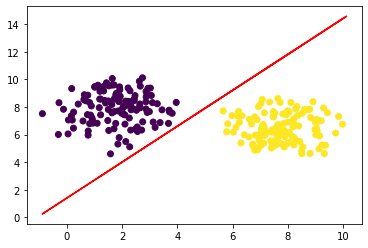

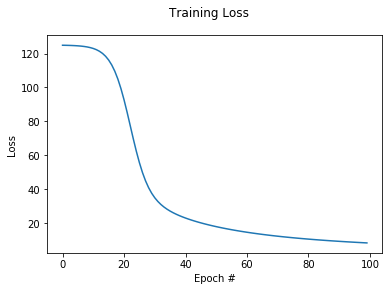

In [5]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# take the dot product between our features `X` and the
	# weight matrix `W`, then pass this value through the
	# sigmoid activation function, thereby giving us our
	# predictions on the dataset
	preds = sigmoid_activation(X.dot(W))

	# now that we have our predictions, we need to determine
	# our `error`, which is the difference between our predictions
	# and the true values
	error = preds - y

	# given our `error`, we can compute the total loss value as
	# the sum of squared loss -- ideally, our loss should
	# decrease as we continue training
	loss = np.sum(error ** 2)
	lossHistory.append(loss)
	print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))
	# the gradient update is therefore the dot product between
	# the transpose of `X` and our error, scaled by the total
	# number of data points in `X`
	gradient = X.T.dot(error) / X.shape[0]

	# in the update stage, all we need to do is nudge our weight
	# matrix in the opposite direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a
	# set of "more optimal" parameters
	W += -args["alpha"] * gradient
# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
	# compute the prediction by taking the dot product of the
	# current feature vector with the weight matrix W, then
	# passing it through the sigmoid activation function
	activation = sigmoid_activation(X[i].dot(W))

	# the sigmoid function is defined over the range y=[0, 1],
	# so we can use 0.5 as our threshold -- if `activation` is
	# below 0.5, it's class `0`; otherwise it's class `1`
	label = 0 if activation < 0.5 else 1

	# show our output classification
	print("activation={:.4f}; predicted_label={}, true_label={}".format(
		activation, label, y[i]))
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

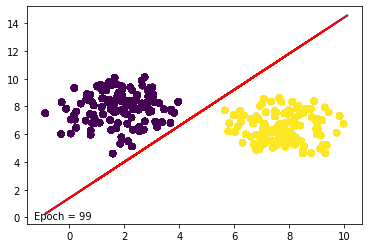

In [6]:
#Plot the contour

fig, ax = plt.subplots()

line, = ax.plot([],[], lw=2)

#ax.set_xlim([-1, 11])
#ax.set_ylim([-1, 16])
#ax.set_autoscale_on(False)

# Create animation

value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

def init():
    line.set_data(X[:], Y[:])
    value_display.set_text('')
    return (line,)

def animate_1(i):
    
    # Animate points
    plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
    plt.plot(X[i], Y[i], "r-")
    # Animate value display
    value_display.set_text('Epoch = ' + str(i))

    return (line,)

anim1 = animation.FuncAnimation(fig, animate_1, init_func=init,
                               frames=100, repeat_delay=60, 
                               interval=100,blit=True)

#plt.show()
rc('animation', html='jshtml')
anim1
#HTML(anim1.to_jshtml())